In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
df = pd.read_csv("base_taller.csv", delimiter=';')

In [38]:
df.head(10)

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
0,231747,Kylian Mbappé Lottin,23,France,182,161,ST,91,95,"190,5",Right,4,5,4,High,Low,Unique,France,Paris Saint Germain,84
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,"107,5",Right,5,4,4,High,Medium,Unique,England,Manchester City,85
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84,Right,4,4,5,High,Medium,Unique,Spain,Fc Barcelona,83
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64,Right,4,4,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85
4,158023,Lionel Andrés Messi Cuccittini,35,Argentina,169,148,RW,91,91,54,Left,4,4,5,Low,Low,Unique,France,Paris Saint Germain,84
5,239085,Erling Braut Haaland,21,Norway,195,207,ST,89,94,160,Left,3,3,4,High,Medium,Unique,England,Manchester City,85
6,192119,Thibaut Nicolas Marc Courtois,30,Belgium,199,212,GK,90,91,90,Left,3,1,4,Medium,Medium,Unique,Spain,Real Madrid,85
7,212831,Alisson Ramsés Becker,29,Brazil,193,201,GK,89,90,79,Right,3,1,3,Medium,Medium,Unique,England,Liverpool,84
8,212622,Joshua Walter Kimmich,27,Germany,177,165,CDM,89,90,"105,5",Right,4,3,4,High,Medium,Normal (170-185),Germany,Fc Bayern München,85
9,209331,Mohamed Salah Ghaly,30,Egypt,175,157,RW,89,89,"99,5",Left,3,4,4,High,Medium,Unique,England,Liverpool,84


In [56]:
df.isnull().sum()

player_id                   0
player_name                 0
age                         0
country                     0
height_cm                   0
weight_lbs                  0
position                    0
overall                     0
potential                   0
Value_millions              0
pref_foot                   0
weak_foot                   0
skill_moves                 0
international_reputation    0
Attacking_work_rate         0
Defensive_work_rate         0
body_type                   0
club_country                0
club_name                   0
club_overall                0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22080 entries, 0 to 22079
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   player_id                 22080 non-null  int64 
 1   player_name               22080 non-null  object
 2   age                       22080 non-null  int64 
 3   country                   22080 non-null  object
 4   height_cm                 22080 non-null  int64 
 5   weight_lbs                22080 non-null  int64 
 6   position                  22080 non-null  object
 7   overall                   22080 non-null  int64 
 8   potential                 22080 non-null  int64 
 9   Value_millions            22080 non-null  object
 10  pref_foot                 22080 non-null  object
 11  weak_foot                 22080 non-null  int64 
 12  skill_moves               22080 non-null  int64 
 13  international_reputation  22080 non-null  int64 
 14  Attacking_work_rate   

In [40]:
df['Value_millions'] = df['Value_millions'].str.replace(',', '.', regex=False)
df['Value_millions'] =pd.to_numeric(df['Value_millions'])

In [41]:
df.describe()

,player_id,age,height_cm,weight_lbs,overall,potential,Value_millions,weak_foot,skill_moves,international_reputation,club_overall
count,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000
mean,238806.667618,24.894112,181.391893,165.399457,65.223958,70.458107,2.501067,2.932699,2.362726,1.075272,68.295743
std,28565.188684,4.891117,6.852274,15.411979,6.804443,6.147813,6.869693,0.673396,0.764252,0.334532,5.358555
min,1179.000000,16.000000,155.000000,108.000000,46.000000,46.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,222433.250000,21.000000,176.000000,154.000000,61.000000,66.000000,0.450000,3.000000,2.000000,1.000000,65.000000
50%,243590.000000,24.000000,181.000000,165.000000,65.000000,70.000000,0.900000,3.000000,2.000000,1.000000,68.000000
75%,262079.500000,28.000000,186.000000,176.000000,70.000000,74.000000,1.800000,3.000000,3.000000,1.000000,71.000000
max,275460.000000,44.000000,206.000000,231.000000,91.000000,95.000000,190.500000,5.000000,5.000000,5.000000,85.000000


In [42]:
df['position'].value_counts()

position
CB     3876
ST     3113
CM     2590
GK     2430
CDM    1829
RB     1416
LB     1379
CAM    1267
RM     1145
LM     1143
RW      548
LW      506
LWB     353
RWB     345
CF      140
Name: count, dtype: int64

In [43]:
df['club_country'].value_counts()

club_country
England                 2741
Germany                 1700
Spain                   1355
Italy                   1178
France                  1167
Argentina                949
United States            832
China PR                 600
Portugal                 576
Turkey                   570
Poland                   562
Netherlands              555
Romania                  528
Belgium                  527
Sweden                   509
Saudi Arabia             501
Norway                   490
Korea Republic           419
Ecuador                  372
Austria                  366
Denmark                  358
Colombia                 350
Bolivia                  347
Scotland                 346
Brazil                   340
Paraguay                 338
Chile                    336
Australia                326
India                    324
Venezuela                322
Peru                     317
Republic of Ireland      299
Switzerland              294
Uruguay                  286
W

<Axes: xlabel='club_country'>

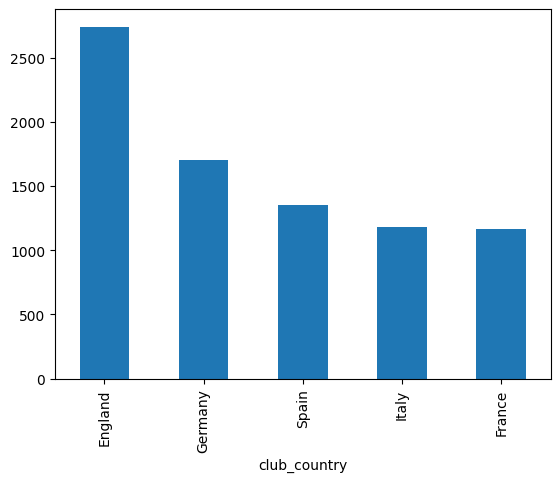

In [44]:
df['club_country'].value_counts().head(5).plot(kind='bar')

In [45]:
df['club_country'].value_counts().size

54

<Axes: >

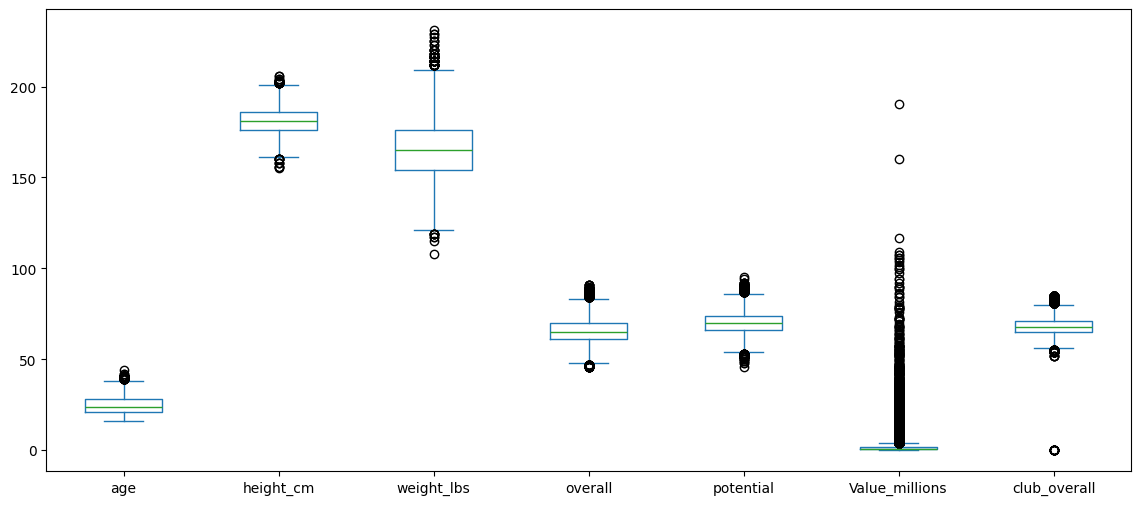

In [46]:
df.select_dtypes(include='number').drop(columns=['player_id', 'weak_foot', 'skill_moves', 'international_reputation']).plot(kind='box', figsize=(14,6))

In [47]:
df['pref_foot'].value_counts()

pref_foot
Right    16733
Left      5347
Name: count, dtype: int64

<Axes: xlabel='pref_foot'>

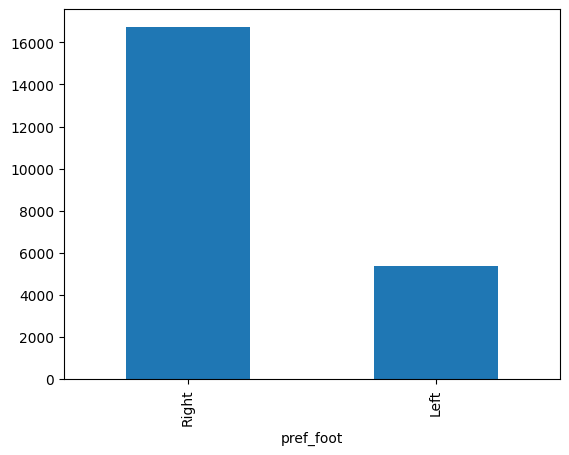

In [48]:
df['pref_foot'].value_counts().plot(kind='bar')

In [49]:
goalKeeperHeight = df.loc[df['position']=='GK', ['height_cm','overall']]
goalKeeperHeight.head()

,height_cm,overall
6,199,90
7,193,89
11,188,89
14,193,89
16,196,88


In [50]:
bins = [0, 185, 192, float('inf')]  # Ranges: <185, 185-192, >192
labels = ["<185 cm", "185-192 cm", ">192 cm"]
goalKeeperHeight['height_group'] = pd.cut(goalKeeperHeight['height_cm'],
                                          bins = bins, labels = labels)
goalKeeperHeight.head()

,height_cm,overall,height_group
6,199,90,>192 cm
7,193,89,>192 cm
11,188,89,185-192 cm
14,193,89,>192 cm
16,196,88,>192 cm


In [51]:
goalKeeperHeight.groupby('height_group')['overall'].describe()

C:\Users\diana\AppData\Local\Temp\ipykernel_19012\749192440.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goalKeeperHeight.groupby('height_group')['overall'].describe()


,count,mean,std,min,25%,50%,75%,max
height_group,,,,,,,,
<185 cm,649.0,62.092450,7.253400,48.0,56.0,62.0,67.0,87.0
185-192 cm,1264.0,64.481013,7.319944,46.0,60.0,64.0,69.0,89.0
>192 cm,517.0,64.746615,7.639378,48.0,60.0,64.0,70.0,90.0


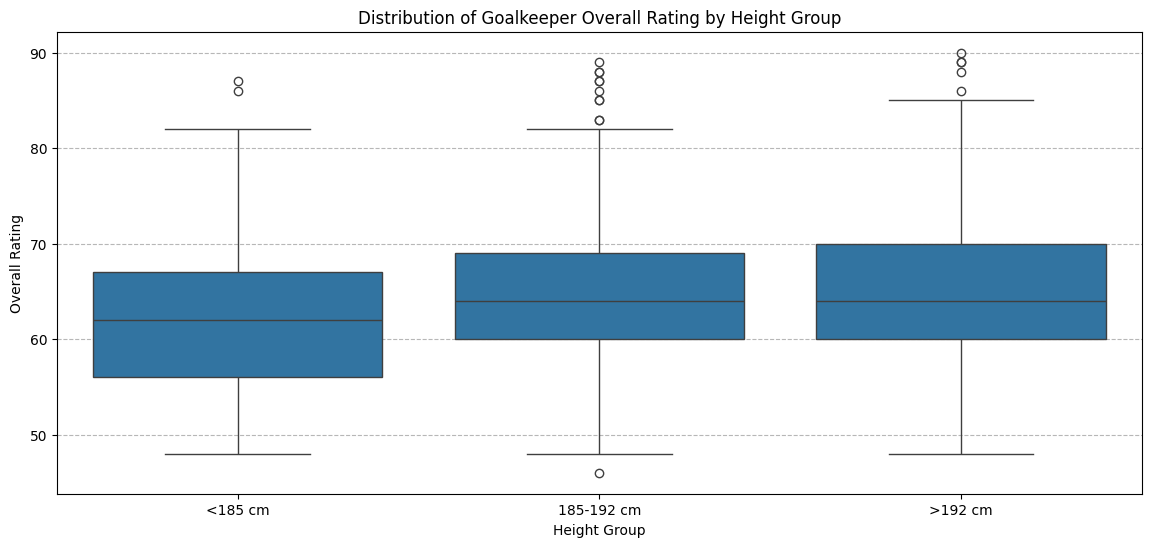

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(goalKeeperHeight, x='height_group', y='overall')
plt.xlabel("Height Group")
plt.ylabel("Overall Rating")
plt.title("Distribution of Goalkeeper Overall Rating by Height Group")
plt.grid(axis='y', linestyle='--', alpha=0.9) #alpha refers to opaqueness 
plt.show()

In [57]:
dominantLeg = df[['pref_foot', 'overall']]
dominantLeg.head()

,pref_foot,overall
0,Right,91
1,Right,91
2,Right,91
3,Right,91
4,Left,91


In [60]:
dominantLeg.groupby('pref_foot')['overall'].describe()

,count,mean,std,min,25%,50%,75%,max
pref_foot,,,,,,,,
Left,5347.0,65.766037,6.548680,46.0,62.0,66.0,70.0,91.0
Right,16733.0,65.050738,6.875354,46.0,61.0,65.0,69.0,91.0


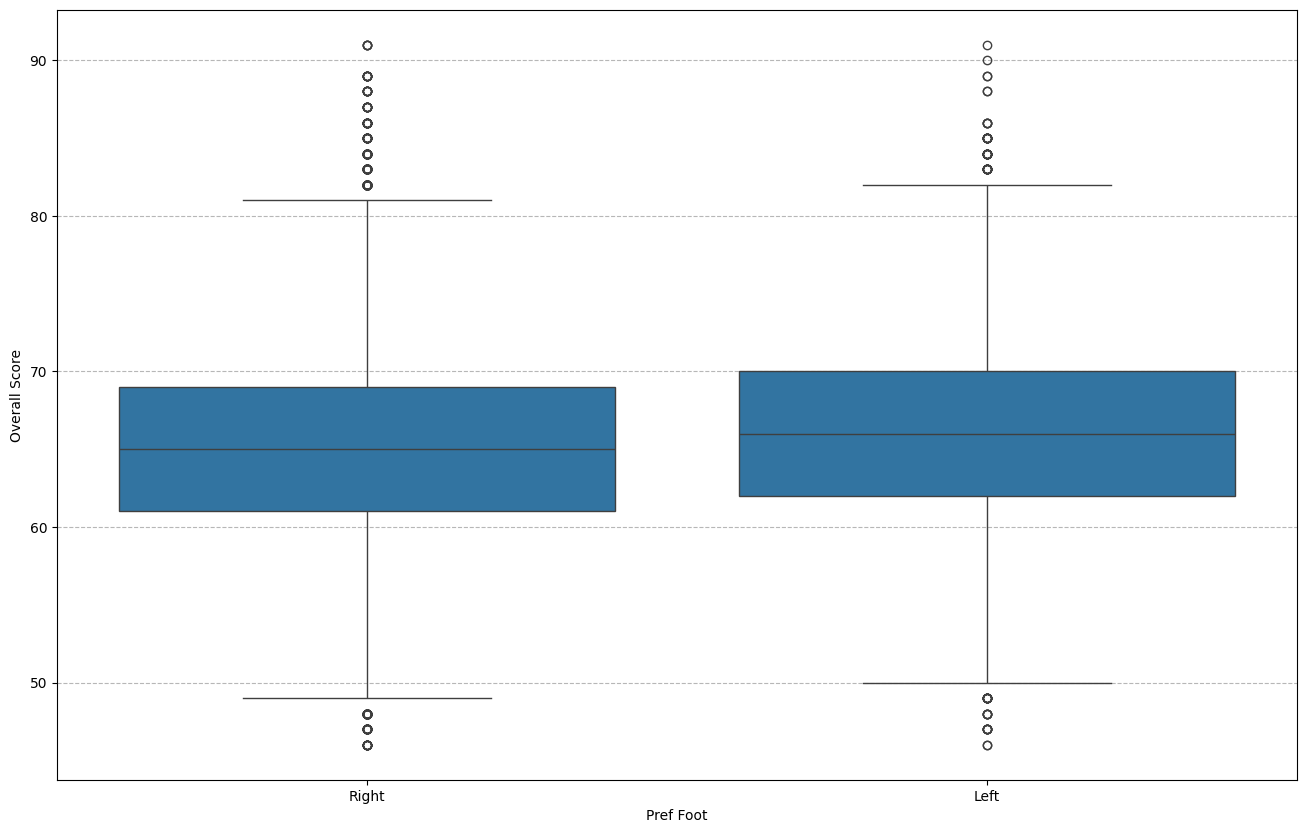

In [72]:
plt.figure(figsize=(16,10))
sns.boxplot(dominantLeg, x='pref_foot', y='overall')
plt.title = "Overall score based on pref foot"
plt.xlabel("Pref Foot")
plt.ylabel("Overall Score")
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()